In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'
pd.options.display.max_rows = 999

kitgreen = (43/256,135/256,115/256)
uiucblue = (19/255,42/255,76/255)
uiucred = (232/255,74/255,39/255)

<ipython-input-1-a933e537d28a>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']


In [2]:

nrep = 1000
d = 1000

distance_min = []
distance_min_std = []
distance_max = []
distance_max_std = []

distance_mean = []
distance_std = []

for d in [1,2,5,10,20,50,100,200,500,1000]:
    print("d=%s"%d)
    d_min = []
    d_max = []

    d_mean = []
    d_std = []

    for x in range(nrep):
        generate = []
        for x in range(d):
            generate = generate + [np.random.uniform(size=100)]
        data = pd.DataFrame(generate).T.values
        
        distances = distance_matrix(data,data).flatten()
        distances = distances[distances != 0] / math.sqrt(d)
        
        d_min += [distances.min()]
        d_max += [distances.max()]
        
        d_mean += [distances.mean()]
        d_std += [distances.std()]
        
    distance_min += [np.mean(d_min)]
    distance_min_std += [np.std(d_min)]
    
    distance_max += [np.mean(d_max)]
    distance_max_std += [np.std(d_max)]
    
    distance_mean += [np.mean(d_mean)]
    distance_std += [np.mean(d_std)]

d=1
d=2
d=5
d=10
d=20
d=50
d=100
d=200
d=500
d=1000


<IPython.core.display.Javascript object>


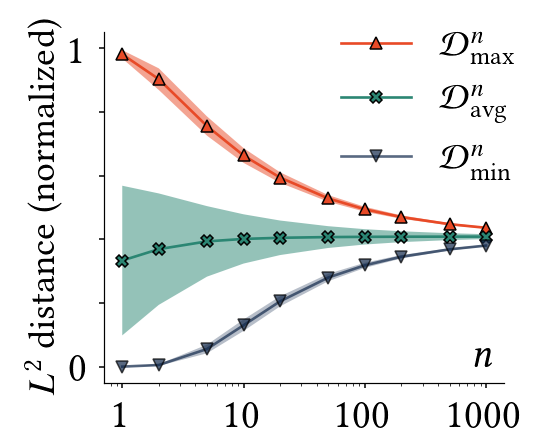

In [3]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(5,4), sharex=True, sharey=True)

ds = [1,2,5,10,20,50,100,200,500,1000]

plt.plot(ds, distance_max, label=r'$\mathcal{D}_{\text{max}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="^", color=uiucred)
plt.fill_between(ds,[x+y for x,y in zip(distance_max,distance_max_std)], 
                 [x-y for x,y in zip(distance_max,distance_max_std)], 
                 alpha=0.5, facecolor=uiucred)

plt.plot(ds, distance_mean, label=r'$\mathcal{D}_{\text{avg}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="X", color=kitgreen)
plt.fill_between(ds,[x+y for x,y in zip(distance_mean,distance_std)], 
                 [x-y for x,y in zip(distance_mean,distance_std)], 
                 alpha=0.5, facecolor=kitgreen)

plt.plot(ds, distance_min, alpha=0.7, label=r'$\mathcal{D}_{\text{min}}^n$', markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker="v", color=uiucblue)
plt.fill_between(ds,[x+y for x,y in zip(distance_min,distance_min_std)], 
                 [x-y for x,y in zip(distance_min,distance_min_std)], 
                 alpha=0.3, facecolor=uiucblue)


plt.legend(fontsize=23, framealpha=0, loc="upper right", bbox_to_anchor=(1.1,1.1))
#plt.xlabel("$d$")
plt.ylabel("$L^2$ distance (normalized)")

#plt.title("The distance concentration effect", size=18)
    
plt.ylim((-0.05,1.05))
plt.xscale("log")
plt.text(800,0,r"\textit{n}", fontsize=27)

plt.tight_layout()
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0", "", "", "", "", "1"], fontsize=27)

plt.xticks([1,10,100,1000], ["1", "10", "100", "1000"], fontsize=27)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig("cod_illustration.pdf")

In [5]:
def r(d):
    return (scipy.special.gamma(1+d/2)/(N*math.sqrt(math.pi**d)))**(1/d)

<IPython.core.display.Javascript object>


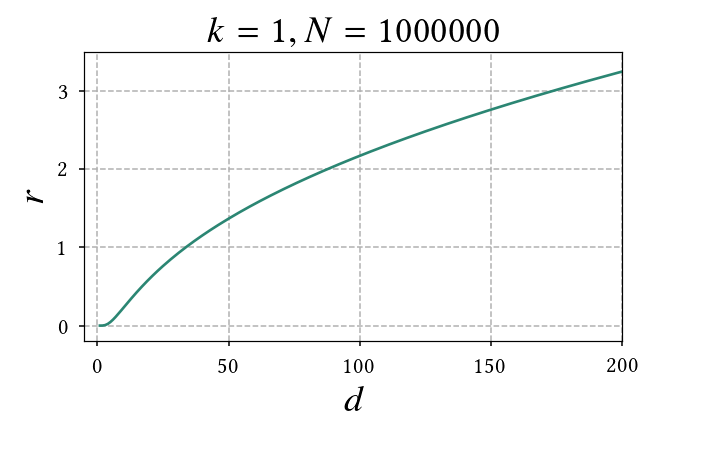

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(1, 1, figsize=(6,4))

N = 1000000
k = 1

ds = [x+1 for x in range(300)]
rs = [r(d) for d in ds] 

plt.plot(ds, rs, color=kitgreen)
plt.title("$k = %s, N= %s$"%(k,N))
plt.xlabel("$d$")
plt.ylabel("$r$")
plt.grid(True, linestyle="--")
plt.xlim((-5,200))
plt.ylim((-0.2, 3.5))

plt.tight_layout()
#plt.savefig("radius_increase.pdf")

<IPython.core.display.Javascript object>


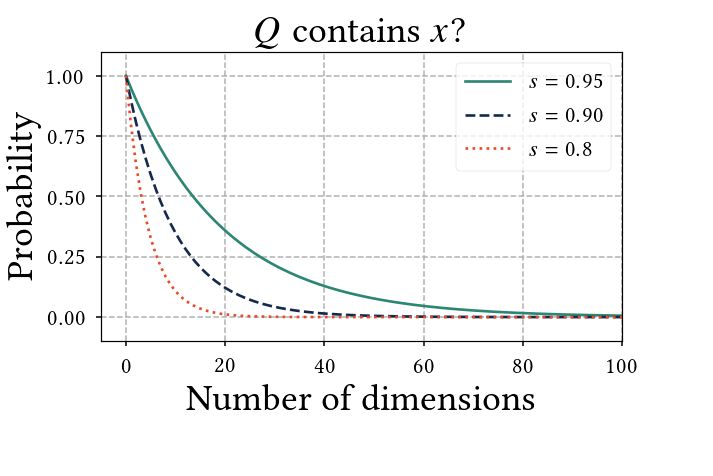

In [7]:
%matplotlib notebook

fig, ax = plt.subplots(1, 1, figsize=(6,4))


k = 1

ds = [x for x in range(300)]

s = 0.95
x1 = [s**d for d in ds] 
plt.plot(ds, x1, color=kitgreen, label="$s=0.95$")

s = 0.90
x2 = [s**d for d in ds] 
plt.plot(ds, x2, color=uiucblue, label="$s=0.90$", linestyle="--")

s = 0.8
x3 = [s**d for d in ds] 
plt.plot(ds, x3, color=uiucred, label="$s=0.8$", linestyle=":")

plt.xlabel("Number of dimensions")
plt.ylabel("Probability")
plt.legend()

plt.title("$Q$ contains $x$?")
plt.grid(True, linestyle="--")
plt.xlim((-5,100))
plt.ylim((-0.1, 1.1))

plt.tight_layout()
#plt.savefig("prob_sparse.pdf")